<a href="https://colab.research.google.com/github/marastika/KANO-MODEL/blob/main/KANO_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving shopee_kano_model_500_respondents.csv to shopee_kano_model_500_respondents (3).csv
                 Search Functionality  Product Recommendations  \
Attractive                         68                       78   
Indifferent                        70                       76   
Must-be                            88                       92   
One-dimensional                    93                       87   
Reverse                           181                      167   

                 Checkout Process  Delivery Speed  Customer Support  \
Attractive                     93              88                82   
Indifferent                    82              74                75   
Must-be                        89              89                96   
One-dimensional                75              73                90   
Reverse                       161             176               157   

                 Return Policy  Discount Offers  Mobile App Performance  \
Attractive 

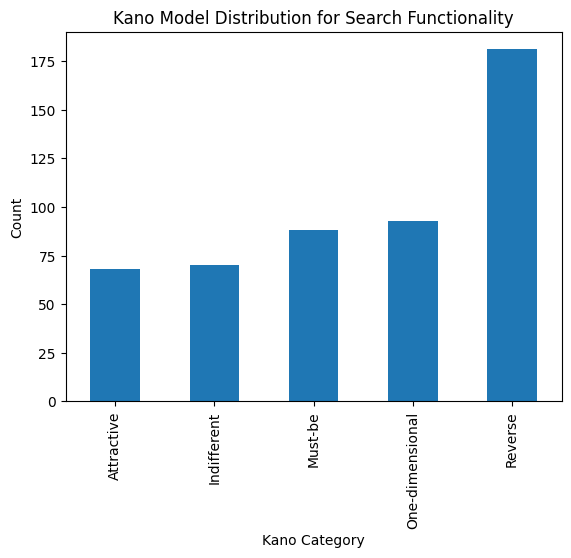

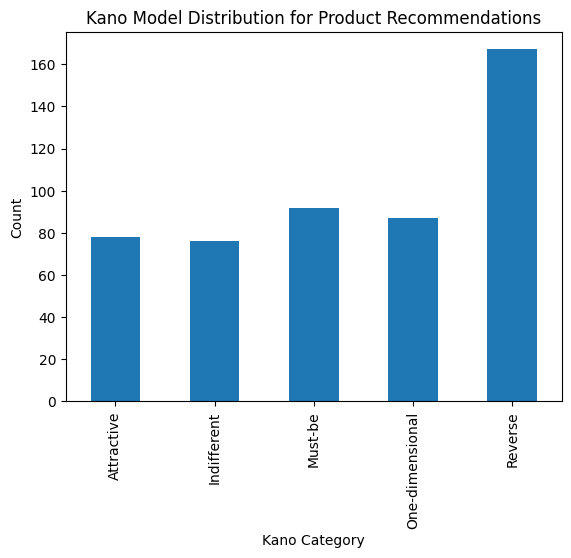

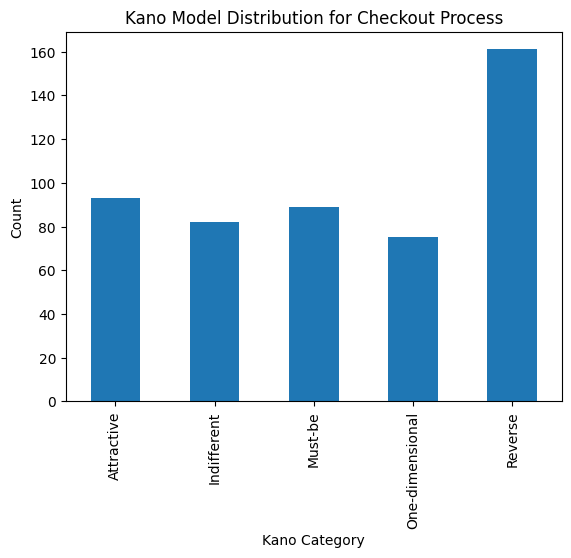

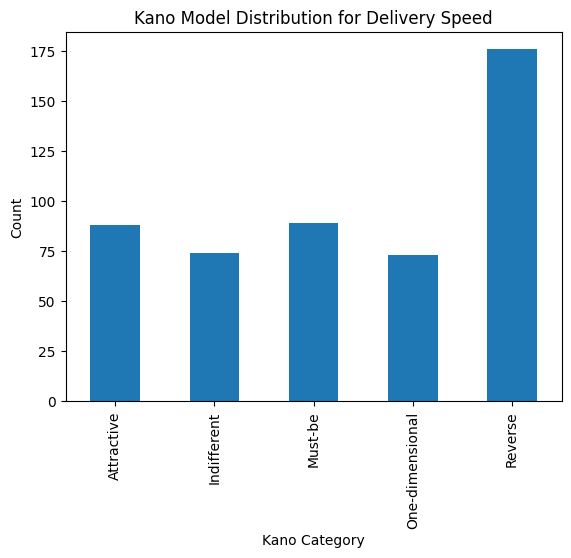

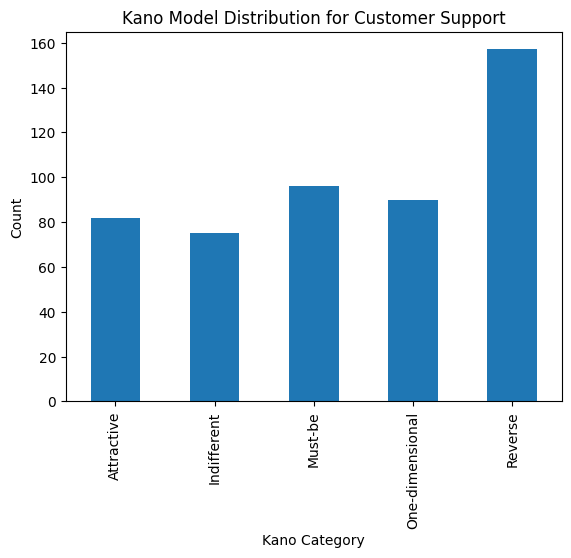

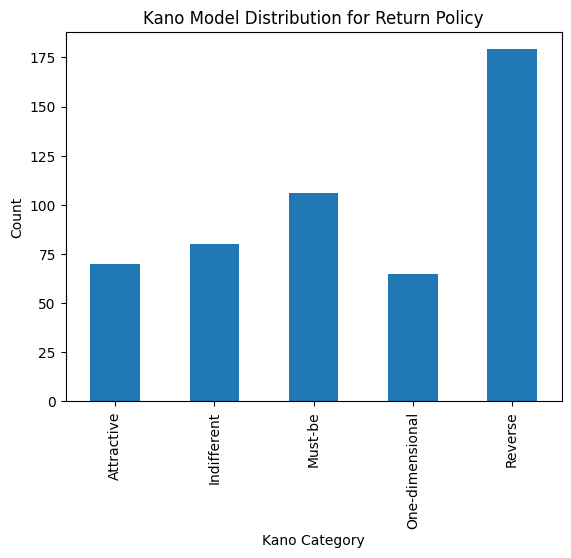

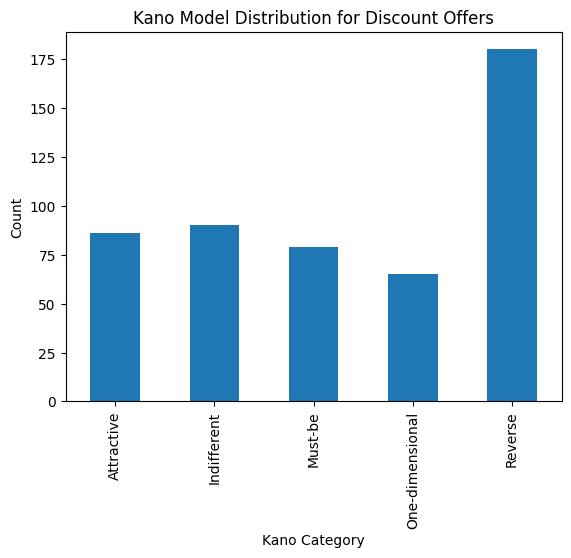

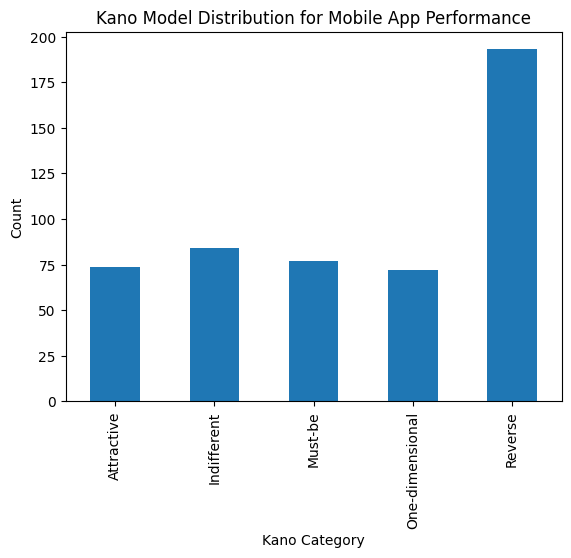

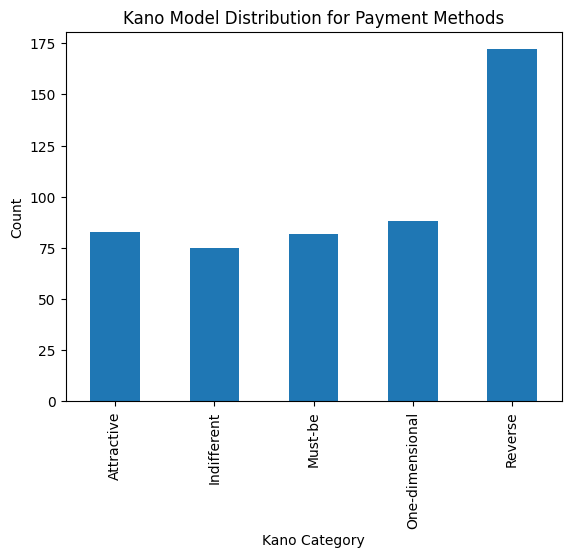

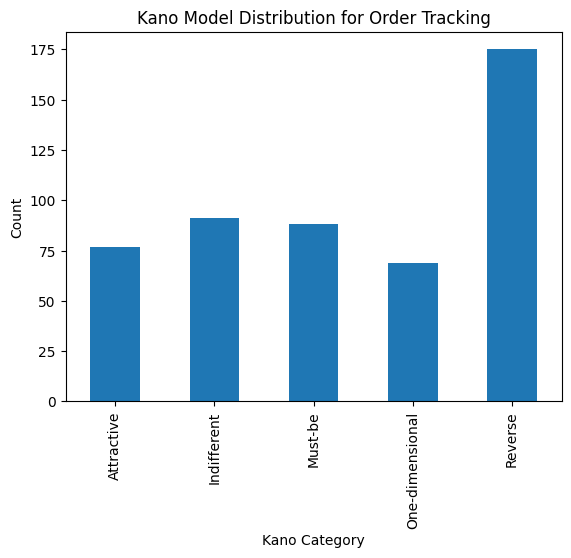

In [3]:
# Step 1: Install necessary libraries (if needed)
# Uncomment the line below if you need to install pandas and matplotlib
# !pip install pandas matplotlib

# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load the dataset
# After running this cell, upload your file 'shopee_kano_model_500_respondents.csv'
from google.colab import files
uploaded = files.upload()

# Step 4: Read the uploaded file
import io

# Get the first filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 5: Define the Kano classification function
def kano_classification(functional, dysfunctional):
    if functional in [4, 5] and dysfunctional in [1, 2]:
        return "Attractive"
    elif functional in [4, 5] and dysfunctional in [4, 5]:
        return "One-dimensional"
    elif functional in [1, 2] and dysfunctional in [4, 5]:
        return "Must-be"
    elif functional in [1, 2] and dysfunctional in [1, 2]:
        return "Indifferent"
    else:
        return "Reverse"

# Step 6: List of features to classify
features = [
    'Search Functionality',
    'Product Recommendations',
    'Checkout Process',
    'Delivery Speed',
    'Customer Support',
    'Return Policy',
    'Discount Offers',
    'Mobile App Performance',
    'Payment Methods',
    'Order Tracking'
]

# Step 7: Apply Kano classification for each feature
kano_results = {}
for feature in features:
    # Classify each response for the given feature
    kano_results[feature] = df.apply(
        lambda row: kano_classification(row[f'{feature} Functional'], row[f'{feature} Dysfunctional']), axis=1
    )

# Convert results to a DataFrame
kano_df = pd.DataFrame(kano_results)

# Step 8: Aggregate the Kano categories for each feature
kano_summary = kano_df.apply(pd.Series.value_counts).fillna(0)

# Step 9: Display the Kano summary
print(kano_summary)

# Step 10: Visualization of the Kano Model results for each feature
# Create bar charts for each feature's Kano category distribution
for feature in features:
    kano_summary[feature].plot(kind='bar', title=f"Kano Model Distribution for {feature}", xlabel="Kano Category", ylabel="Count")
    plt.show()

# Bagian Baru

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate satisfaction and dissatisfaction coefficients
def kano_coefficients(data):
    satisfaction = (data == 4).sum() + (data == 5).sum()  # Attractive + Performance
    dissatisfaction = (data == 3).sum() + (data == 4).sum()  # Must-be + Performance
    total = len(data)
    satisfaction_coeff = satisfaction / total if total != 0 else 0
    dissatisfaction_coeff = dissatisfaction / total if total != 0 else 0
    return satisfaction_coeff, dissatisfaction_coeff

# Load the dataset (you can upload the dataset manually in Colab)
from google.colab import files
uploaded = files.upload()

# Assuming the file is uploaded, read the CSV file
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name, delimiter=';')

# Split the data properly based on semicolon and clean it
data_split = data[0].str.split(';', expand=True)
data_cleaned = data_split.rename(columns=data_split.iloc[0]).drop(data_split.index[0])
data_cleaned.reset_index(drop=True, inplace=True)

# Convert to numeric for analysis
data_cleaned_numeric = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to store Kano results
kano_results = {}

# Calculate the satisfaction and dissatisfaction coefficients for each attribute
for col in data_cleaned_numeric.columns:
    satisfaction_coeff, dissatisfaction_coeff = kano_coefficients(data_cleaned_numeric[col])
    kano_results[col] = {
        'Satisfaction Coefficient (A + P)': satisfaction_coeff,
        'Dissatisfaction Coefficient (M + P)': dissatisfaction_coeff
    }

# Convert the results into a DataFrame for display
kano_df = pd.DataFrame(kano_results).T

# Visualization
# Plot the satisfaction and dissatisfaction coefficients

# Bar chart for satisfaction and dissatisfaction coefficients
plt.figure(figsize=(10, 6))

# Plot Satisfaction Coefficients
plt.bar(kano_df.index, kano_df['Satisfaction Coefficient (A + P)'], width=0.4, label='Satisfaction (A + P)', align='center')

# Plot Dissatisfaction Coefficients
plt.bar(kano_df.index, kano_df['Dissatisfaction Coefficient (M + P)'], width=0.4, label='Dissatisfaction (M + P)', align='edge')

# Adding labels and title
plt.xlabel('Attributes')
plt.ylabel('Coefficient Value')
plt.title('Kano Model: Satisfaction vs Dissatisfaction Coefficients')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Display the Kano analysis results
kano_df


Saving shopee_kano_model_500_respondents.csv to shopee_kano_model_500_respondents (4).csv


KeyError: 0

Saving shopee_kano_model_500_respondents.csv to shopee_kano_model_500_respondents (5).csv


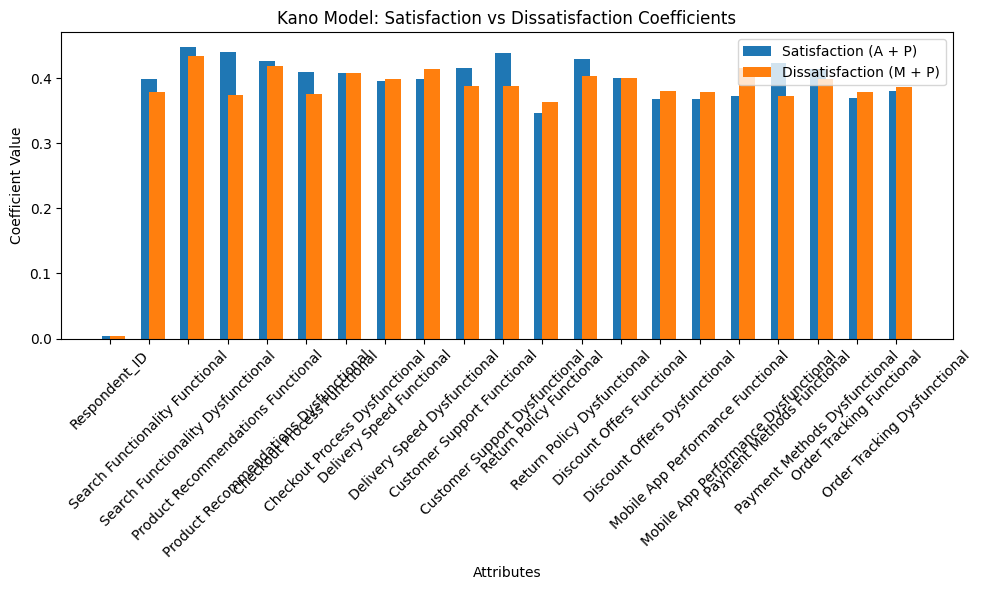

,Satisfaction Coefficient (A + P),Dissatisfaction Coefficient (M + P)
Respondent_ID,0.004,0.004
Search Functionality Functional,0.398,0.378
Search Functionality Dysfunctional,0.448,0.434
Product Recommendations Functional,0.440,0.374
Product Recommendations Dysfunctional,0.426,0.418
Checkout Process Functional,0.410,0.376
Checkout Process Dysfunctional,0.408,0.408
Delivery Speed Functional,0.396,0.398
Delivery Speed Dysfunctional,0.398,0.414
Customer Support Functional,0.416,0.388


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate satisfaction and dissatisfaction coefficients
def kano_coefficients(data):
    satisfaction = (data == 4).sum() + (data == 5).sum()  # Attractive + Performance
    dissatisfaction = (data == 3).sum() + (data == 4).sum()  # Must-be + Performance
    total = len(data)
    satisfaction_coeff = satisfaction / total if total != 0 else 0
    dissatisfaction_coeff = dissatisfaction / total if total != 0 else 0
    return satisfaction_coeff, dissatisfaction_coeff

# Load the dataset (you can upload the dataset manually in Colab)
from google.colab import files
uploaded = files.upload()

# Assuming the file is uploaded, read the CSV file
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name) # Remove delimiter and directly read the CSV

# Initialize a dictionary to store Kano results
kano_results = {}

# Calculate the satisfaction and dissatisfaction coefficients for each attribute
# Access columns using their names instead of index
for col in data.columns:
    satisfaction_coeff, dissatisfaction_coeff = kano_coefficients(data[col])
    kano_results[col] = {
        'Satisfaction Coefficient (A + P)': satisfaction_coeff,
        'Dissatisfaction Coefficient (M + P)': dissatisfaction_coeff
    }

# Convert the results into a DataFrame for display
kano_df = pd.DataFrame(kano_results).T

# Visualization
# Plot the satisfaction and dissatisfaction coefficients

# Bar chart for satisfaction and dissatisfaction coefficients
plt.figure(figsize=(10, 6))

# Plot Satisfaction Coefficients
plt.bar(kano_df.index, kano_df['Satisfaction Coefficient (A + P)'], width=0.4, label='Satisfaction (A + P)', align='center')

# Plot Dissatisfaction Coefficients
plt.bar(kano_df.index, kano_df['Dissatisfaction Coefficient (M + P)'], width=0.4, label='Dissatisfaction (M + P)', align='edge')

# Adding labels and title
plt.xlabel('Attributes')
plt.ylabel('Coefficient Value')
plt.title('Kano Model: Satisfaction vs Dissatisfaction Coefficients')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Display the Kano analysis results
kano_df